In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [26]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [28]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, verbose=0)

KeyboardInterrupt: 

In [ ]:
## In the above model fitting, verbose = 0 means that it will not show the accuracy at every epoch

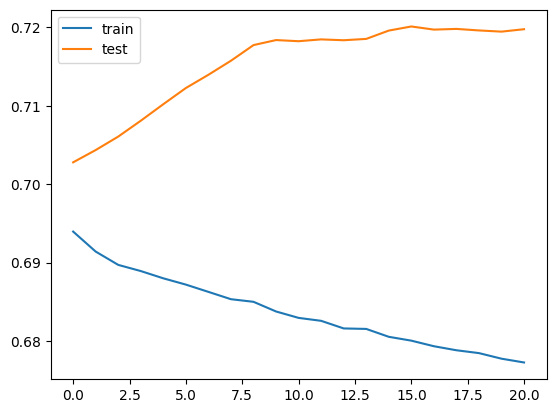

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test') ## This represents the loss on validation set
## We can use this only because in model.fit() we have used validation_data
plt.legend()
plt.show()

In [ ]:
## In this according to the graph the best number of epoch will be near 350
## After that the model is overfitting

In [ ]:
model2 = Sequential()

model2.add(Dense(256, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
### Now for implementing early stopping we have to implement a callback function 
callback = EarlyStopping(
    monitor="val_loss",
    #  "val_loss", which means the validation loss. The training will stop when the validation loss stops decreasing
    min_delta=0.00001,
    #  minimum change in the monitored quantity to qualify as an improvement. In this case, it's set to 0.00001.
    patience=20,
    # The number of epochs with no improvement after which training will be stopped.
    verbose=1,
    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. If set to 1, it will print a message when training stops due to early stopping. 
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 91ms/step - loss: 0.6917 - accuracy: 0.4875 - val_loss: 0.6966 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6895 - accuracy: 0.5250 - val_loss: 0.6996 - val_accuracy: 0.4500
Epoch 3/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.6881 - accuracy: 0.5250 - val_loss: 0.7026 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6867 - accuracy: 0.5375 - val_loss: 0.7057 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6856 - accuracy: 0.5375 - val_loss: 0.7088 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6849 - accuracy: 0.5500 - val_loss: 0.7112 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6840 - accuracy: 0.5500 - val_loss: 0.7125 - val_accuracy: 0.4000
Epoch 8/3500
